# Diabetes Prediction Analysis

This notebook performs exploratory analysis, visualizations, and hypothesis testing on the Diabetes Prediction dataset.

In [24]:

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


In [2]:

# Load dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

# Display first 5 rows
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:

# Check dataset info and summary statistics
print(df.info())
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [4]:

# Check for missing values
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:

# Compute averages
avg_bmi = df['bmi'].mean()
avg_glucose = df['blood_glucose_level'].mean()
avg_hba1c = df['HbA1c_level'].mean()
avg_hypertension = df['hypertension'].mean()

avg_bmi, avg_glucose, avg_hba1c, avg_hypertension


(np.float64(27.3207671),
 np.float64(138.05806),
 np.float64(5.527507),
 np.float64(0.07485))

In [6]:

# Correlation matrix among health indicators
corr = df[['bmi', 'blood_glucose_level', 'HbA1c_level', 'hypertension']].corr()
corr


,bmi,blood_glucose_level,HbA1c_level,hypertension
bmi,1.000000,0.091261,0.082997,0.147666
blood_glucose_level,0.091261,1.000000,0.166733,0.084429
HbA1c_level,0.082997,0.166733,1.000000,0.080939
hypertension,0.147666,0.084429,0.080939,1.000000


In [7]:

# Group by diabetes status and compare means
group_means = df.groupby('diabetes').mean(numeric_only=True)
group_means


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,
0,40.115187,0.058984,0.029235,26.887163,5.396761,132.852470
1,60.946588,0.245647,0.149059,31.988382,6.934953,194.094706


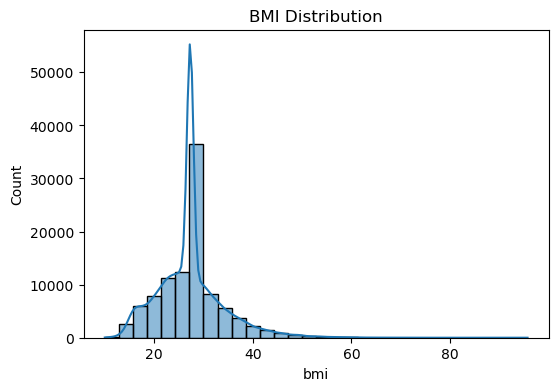

In [8]:

# Histogram of BMI
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()


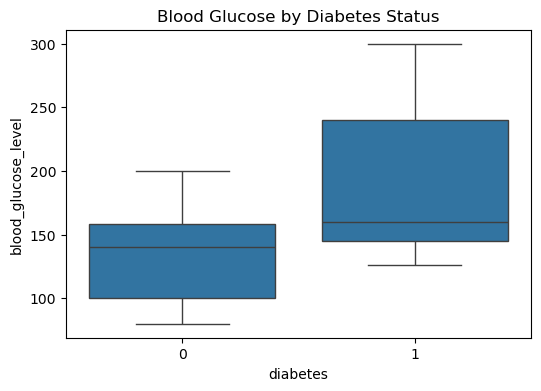

In [9]:

# Boxplot: Glucose by Diabetes Status
plt.figure(figsize=(6,4))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title("Blood Glucose by Diabetes Status")
plt.show()


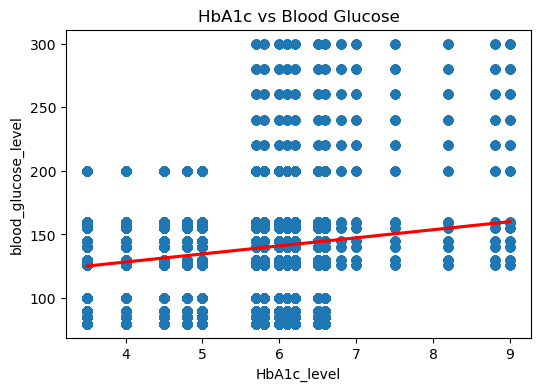

In [10]:

# Regression plot: HbA1c vs Glucose
plt.figure(figsize=(6,4))
sns.regplot(x='HbA1c_level', y='blood_glucose_level', data=df, line_kws={"color":"red"})
plt.title("HbA1c vs Blood Glucose")
plt.show()


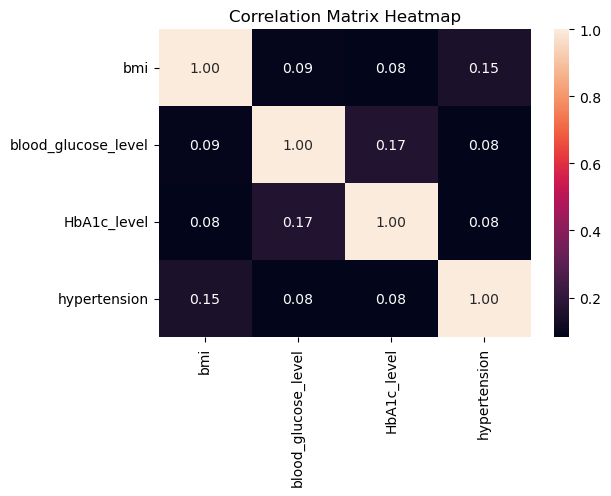

In [12]:

# Heatmap of correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [19]:
# Hypothesis: mean BMI = 25
p_mean = 25
s_mean = df['bmi'].mean()
p_std = df['bmi'].std()   
n = df['bmi'].count()

z_test = (s_mean - p_mean) / (p_std / np.sqrt(n))
z_crit = stats.norm.ppf(1 - 0.05/2)  

print("Z-test value:", z_test)
print("Z-critical:", z_crit)
if abs(z_test) > z_crit:
    print("Reject H0 -> BMI is significantly different from 25")
else:
    print("Fail to reject H0 -> No significant difference")

Z-test value: 110.57931974053524
Z-critical: 1.959963984540054
Reject H0 -> BMI is significantly different from 25


In [23]:
# Split groups
age_pos = df[df['diabetes'] == 'Positive']['age']
age_neg = df[df['diabetes'] == 'Negative']['age']

# Independent T-test
t_stat, p_value = ttest_ind(age_pos, age_neg, equal_var=False)

print("T-test statistic:", t_stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject H0 -> Age differs significantly between diabetic and non-diabetic groups")
else:
    print("Fail to reject H0 -> No significant age difference")

T-test statistic: nan
p-value: nan
Fail to reject H0 -> No significant age difference


In [25]:
# Create contingency table
contingency = pd.crosstab(df['smoking_history'], df['diabetes'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
if p < 0.05:
    print("Reject H0 -> Smoking history is related to Diabetes status")
else:
    print("Fail to reject H0 -> No significant relationship")

Chi-Square Statistic: 1956.0944200848764
p-value: 0.0
Degrees of freedom: 5
Reject H0 -> Smoking history is related to Diabetes status



## Summary & Insights

- Diabetic patients showed higher **Blood Glucose** and **HbA1c** levels on average.  
- Z-test showed whether BMI significantly differs from 25.  
- T-test revealed whether age distributions between diabetic and non-diabetic groups differ.  
- Chi-square test indicated whether **smoking history is associated with diabetes**.  
- Correlation heatmap confirmed strong links between glucose and HbA1c levels.  
- Healthcare professionals can use these indicators for **risk assessment and early detection** of diabetes.  
